Code for making the figure showing farm size distributions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# US meat chickens
# Data from the Sentience Institute analysis, based on US Ag Census 2022
# https://docs.google.com/spreadsheets/d/1iUpRFOPmAE5IO4hO4PyS4MP_kHzkuM_-soqAyVNQcJc/edit?usp=sharing

us = pd.DataFrame()
us["Birds per farm"] = ["1-1999", "2000-15999", "16000-29999", "30000-59999",\
                          "60000-99999", "100000-199999", "200000-299999",\
                          "300000-499999", "500000+"]
us["Number of farms"] = [17052, 527, 83, 111, 260, 1454, 1424, 3560, 7406]

In [3]:
bins = [1, 2000, 16000, 30000, 60000, 100000, 200000, 300000, 500000, np.nan]

In [4]:
# Gujarat meat chickens, from Dupas et al., (2024)

f = '/content/drive/MyDrive/CAFO_data/India/Gujarat_broilers.shp'
gdf = gpd.read_file(f)
gujarat, _ = np.histogram(gdf.Stock, bins=bins)

In [5]:
# Chile "birds", official records supplied by C. Liebsch

f = '/content/drive/MyDrive/CAFO_data/Chile/RUP-aves-2022 (2) (3).xlsx'
df = pd.read_excel(f)
df = df[df["CANTIDAD"] > 0]
chile, _ = np.histogram(df.CANTIDAD, bins=bins)

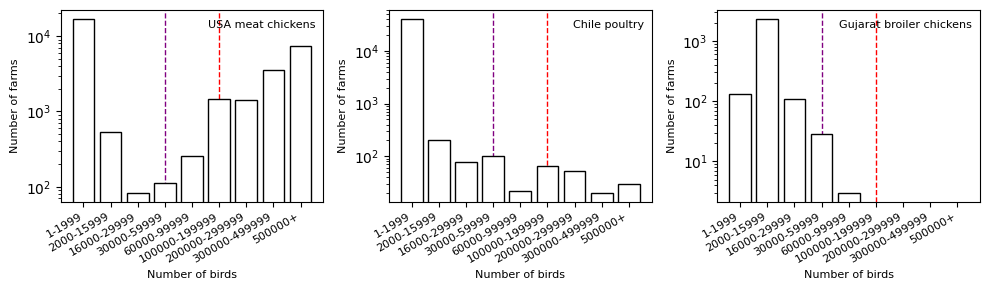

In [13]:
# Make the plot
_, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(10, 3))
ax0.bar(range(len(us)), us["Number of farms"], facecolor='w', edgecolor='k')
ax1.bar(range(len(chile)), chile, facecolor='w', edgecolor='k')
ax2.bar(range(len(gujarat)), gujarat, facecolor='w', edgecolor='k')

labels = ['USA meat chickens', 'Chile poultry', 'Gujarat broiler chickens']

for ax, label in zip((ax0, ax1, ax2), labels):
  ax.set_yscale('log')
  ax.axvline(3, color='purple', ls='--', lw=1, zorder=0)
  ax.axvline(5, color='red', ls='--', lw=1, zorder=0)
  ax.text(0.97, 0.95, label, transform=ax.transAxes, ha='right', va='top',\
          fontsize=8)
  ax.set_xticks(range(len(us)), us["Birds per farm"], rotation=30, fontsize=8,\
                ha='right')
  ax.set_xlabel("Number of birds", fontsize=8)
  ax.set_ylabel("Number of farms", fontsize=8)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CAFO_data/Analysis/farm_size_comparison.png')